<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## Load and Prepare Data

In [33]:
df = pd.read_csv(r"F:\jupyter\educational-\educational\csv\mansori\Mall_Customers2.csv")
df.head()
df=df.set_index('CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [34]:
print(df.info(),3*'\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None 



              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000

## Data Preprocessing

In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
# Encoding categorical variables
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [36]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

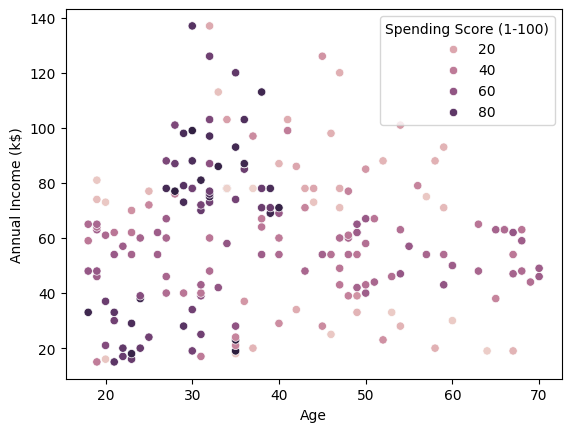

In [37]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

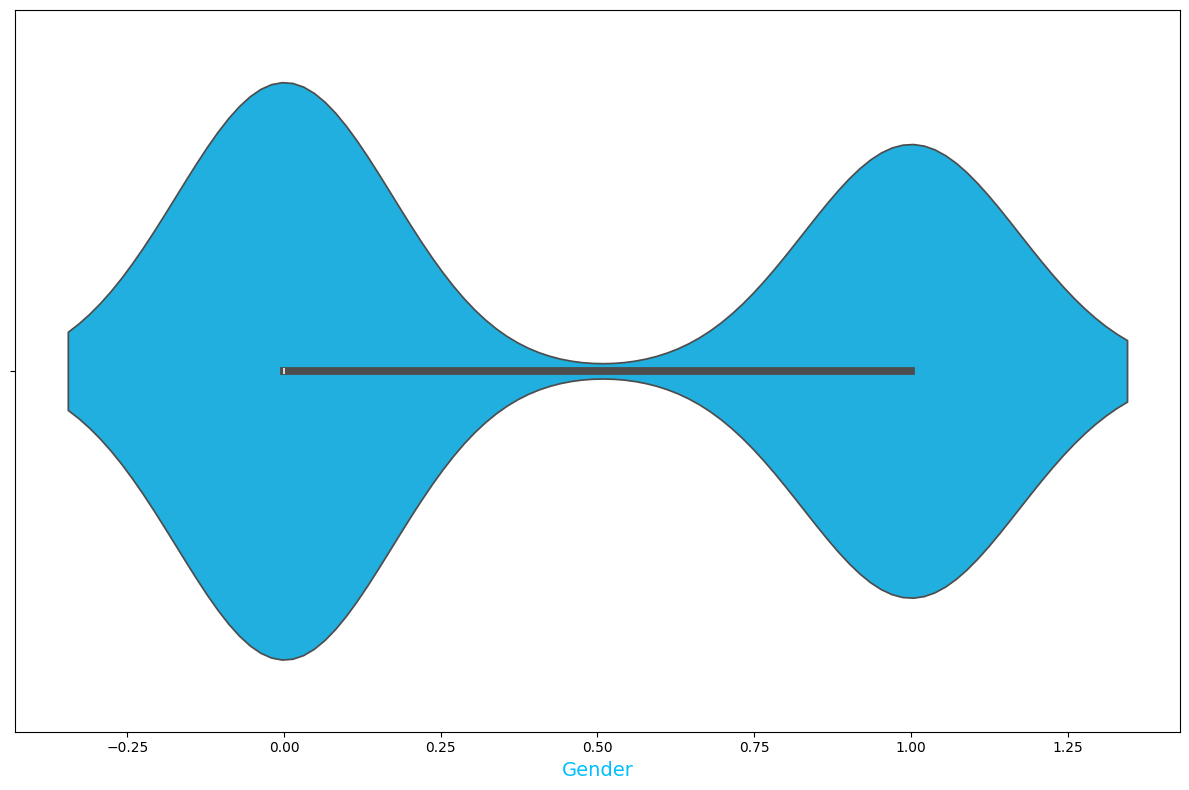

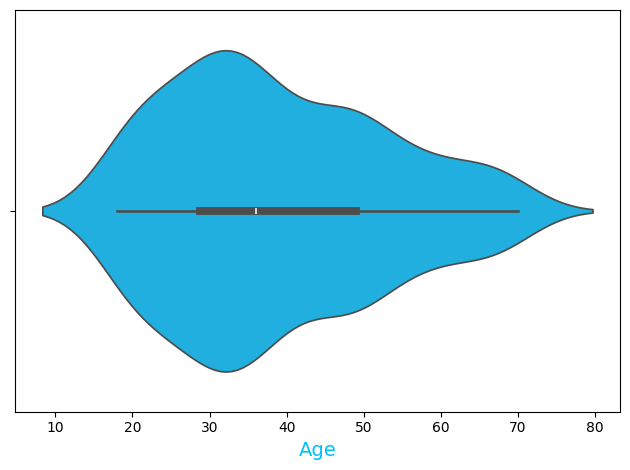

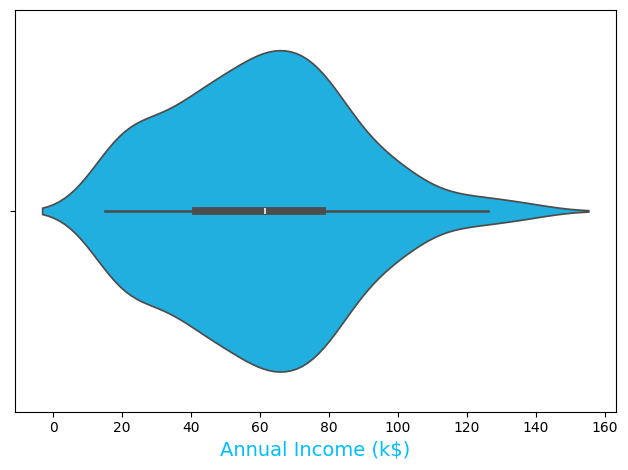

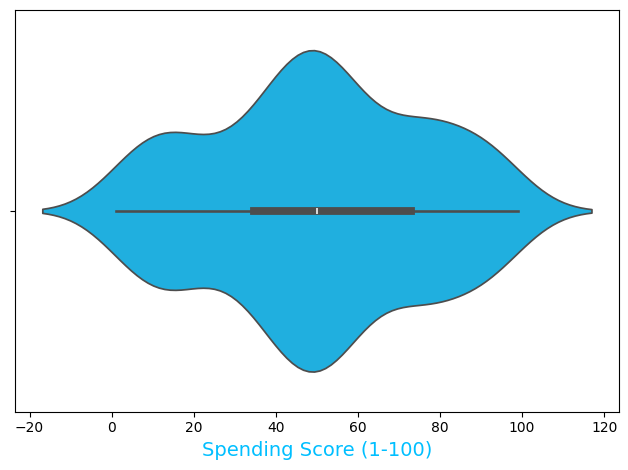

In [38]:
fig = plt.figure(figsize=(12,8))
for i in df.columns:
    sns.violinplot(x=df[i], color='deepskyblue')
    plt.xlabel(i, fontsize=14, color='deepskyblue')
    plt.tight_layout()
    plt.show()


## Strorytelling - Visualization

In [39]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## Trani the Model (Clustering)

In [40]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)


KMeans(n_clusters=3, n_init=12)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

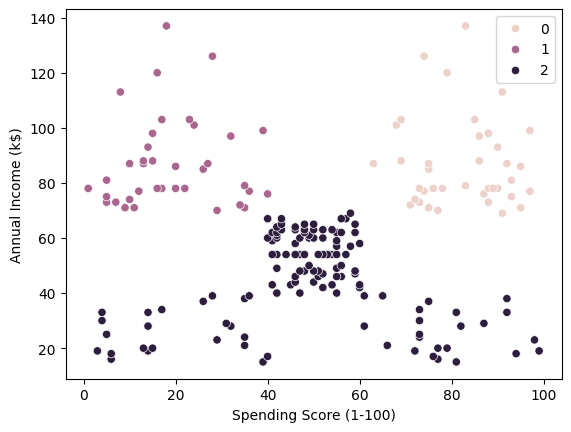

In [41]:
sns.scatterplot(data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = k_means.labels_)

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

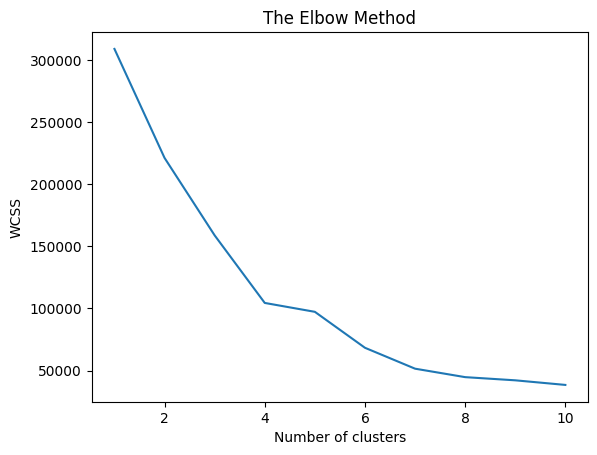

In [43]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

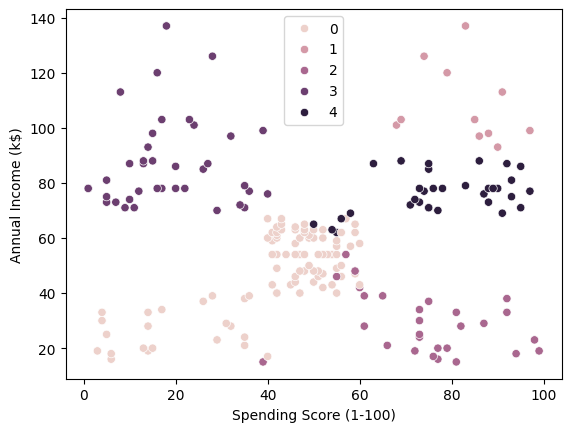

In [46]:
sns.scatterplot(data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = kmeans.labels_)

In [49]:
df["Clus_km"] = kmeans.labels_
df.groupby('Clus_km').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,0.382022,46.213483,47.719101,41.797753
1,0.454545,32.454545,108.181818,82.727273
2,0.482759,24.689655,29.586207,73.655172
3,0.526316,40.394737,87.000000,18.631579
4,0.454545,31.787879,76.090909,77.757576


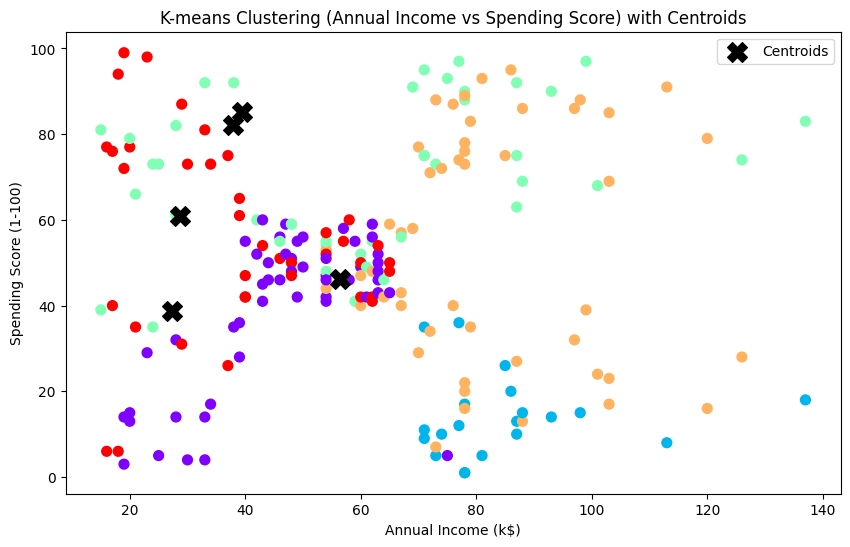

In [54]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids)

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], c='black', s=200, marker='X', label='Centroids')
plt.title("K-means Clustering (Annual Income vs Spending Score) with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

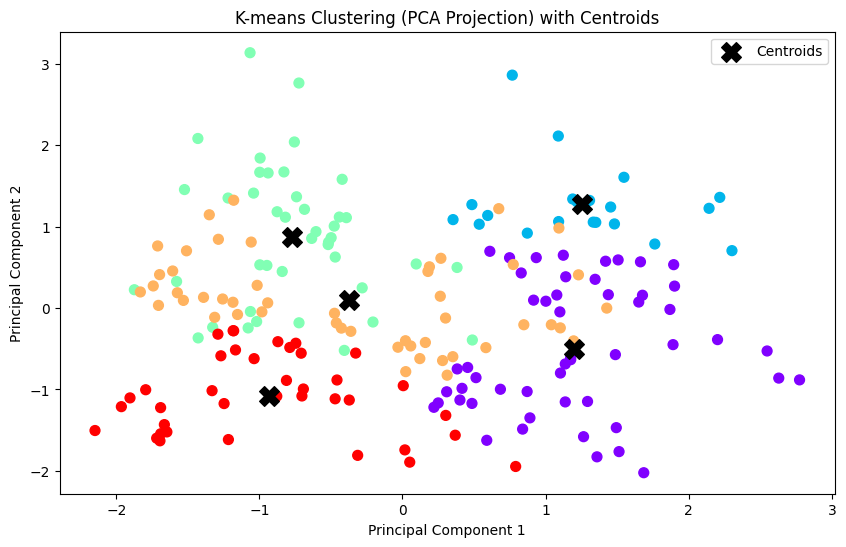

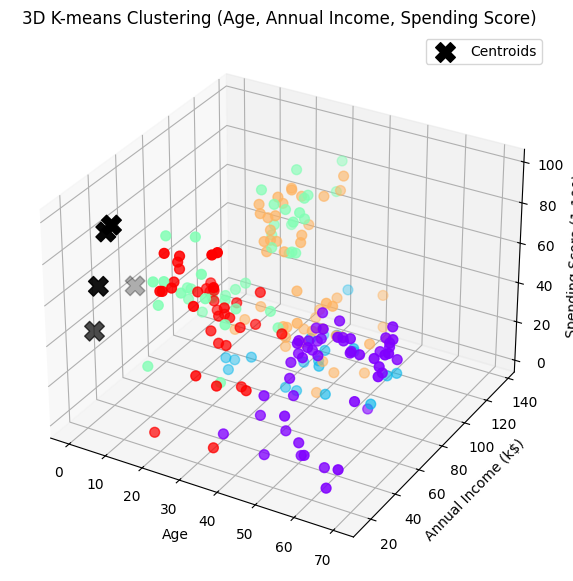

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("K-means Clustering (PCA Projection) with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='rainbow', s=50)

ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2],
        c='black', s=200, marker='X', label='Centroids')

ax.set_title("3D K-means Clustering (Age, Annual Income, Spending Score)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.legend()

plt.show()

            Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  5.098039e-01           56.470588               46.098039        0
1  1.000000e+00           39.500000               85.150000        1
2  1.000000e+00           28.690476               60.904762        2
3 -1.665335e-16           37.897959               82.122449        3
4  1.665335e-16           27.315789               38.842105        4


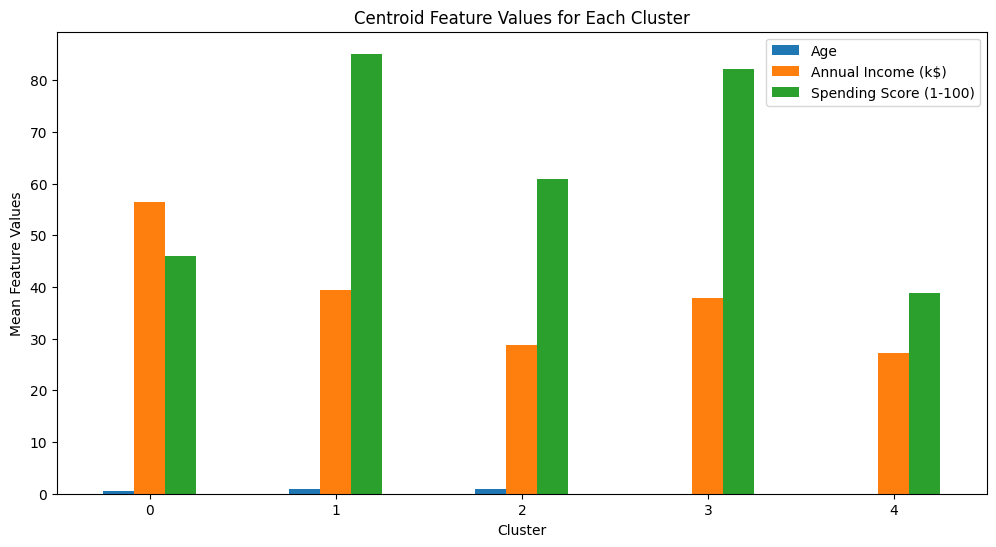

In [71]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_


centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=['Age','Annual Income (k$)','Spending Score (1-100)','Cluster'])  # Convert to listcentroids_df['Cluster'] = range(len(centroids_df))
centroids_df['Cluster'] = range(len(centroids_df))
print(centroids_df)

centroids_df.set_index('Cluster').plot(kind='bar', figsize=(12, 6))
plt.title("Centroid Feature Values for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Feature Values")
plt.xticks(rotation=0)
plt.show()


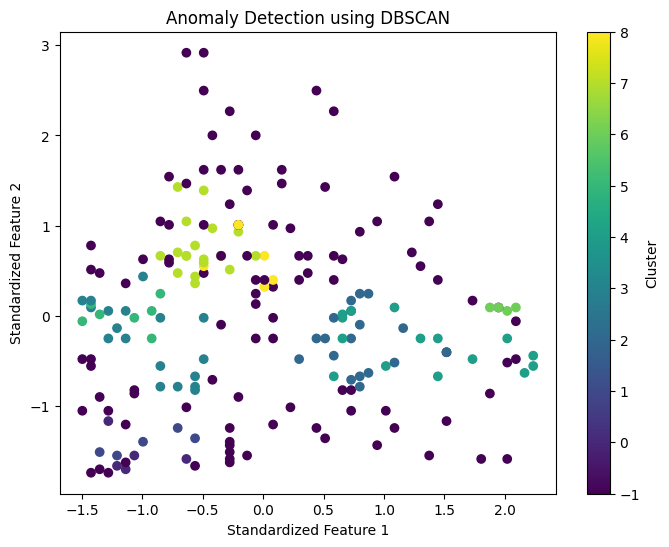

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=clusters_dbscan, cmap='viridis')
plt.title('Anomaly Detection using DBSCAN')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [73]:
featureset = df[['Gender',  'Spending Score (1-100)', 'Annual Income (k$)']]

In [74]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.        , 0.3877551 , 0.        ],
       [1.        , 0.81632653, 0.        ],
       [0.        , 0.05102041, 0.00819672],
       [0.        , 0.7755102 , 0.00819672],
       [0.        , 0.39795918, 0.01639344]])

In [75]:
import scipy
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 


leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.42857143, 1.05520493, ..., 0.97742145, 1.0227015 ,
        1.09616727],
       [0.42857143, 0.        , 1.25926989, ..., 0.91263558, 1.18880836,
        1.00020822],
       [1.05520493, 1.25926989, 0.        , ..., 1.51473416, 1.41374237,
        1.61276802],
       ...,
       [0.97742145, 0.91263558, 1.51473416, ..., 0.        , 0.57849818,
        0.12869934],
       [1.0227015 , 1.18880836, 1.41374237, ..., 0.57849818, 0.        ,
        0.66326531],
       [1.09616727, 1.00020822, 1.61276802, ..., 0.12869934, 0.66326531,
        0.        ]])

In [76]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7672\227076933.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [77]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([5, 5, 2, 3, 1, 3, 2, 3, 5, 3, 5, 3, 2, 3, 5, 5, 1, 5, 5, 3, 5, 5,
       2, 5, 2, 5, 1, 5, 1, 3, 5, 3, 5, 5, 2, 3, 2, 3, 1, 3, 1, 5, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 5, 5, 1, 1, 5, 5,
       1, 1, 5, 1, 5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1,
       1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5,
       5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 3, 5, 5, 5, 5, 5, 5,
       1, 3, 5, 3, 2, 5, 5, 3, 2, 5, 1, 3, 5, 5, 5, 3, 1, 5, 5, 5, 1, 3,
       1, 3, 5, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 1, 5, 5, 5, 5, 5, 2, 3,
       5, 5, 5, 5, 1, 3, 5, 3, 1, 5, 2, 5, 2, 3, 2, 3, 4, 3, 2, 3, 2, 4,
       4, 4], dtype=int32)

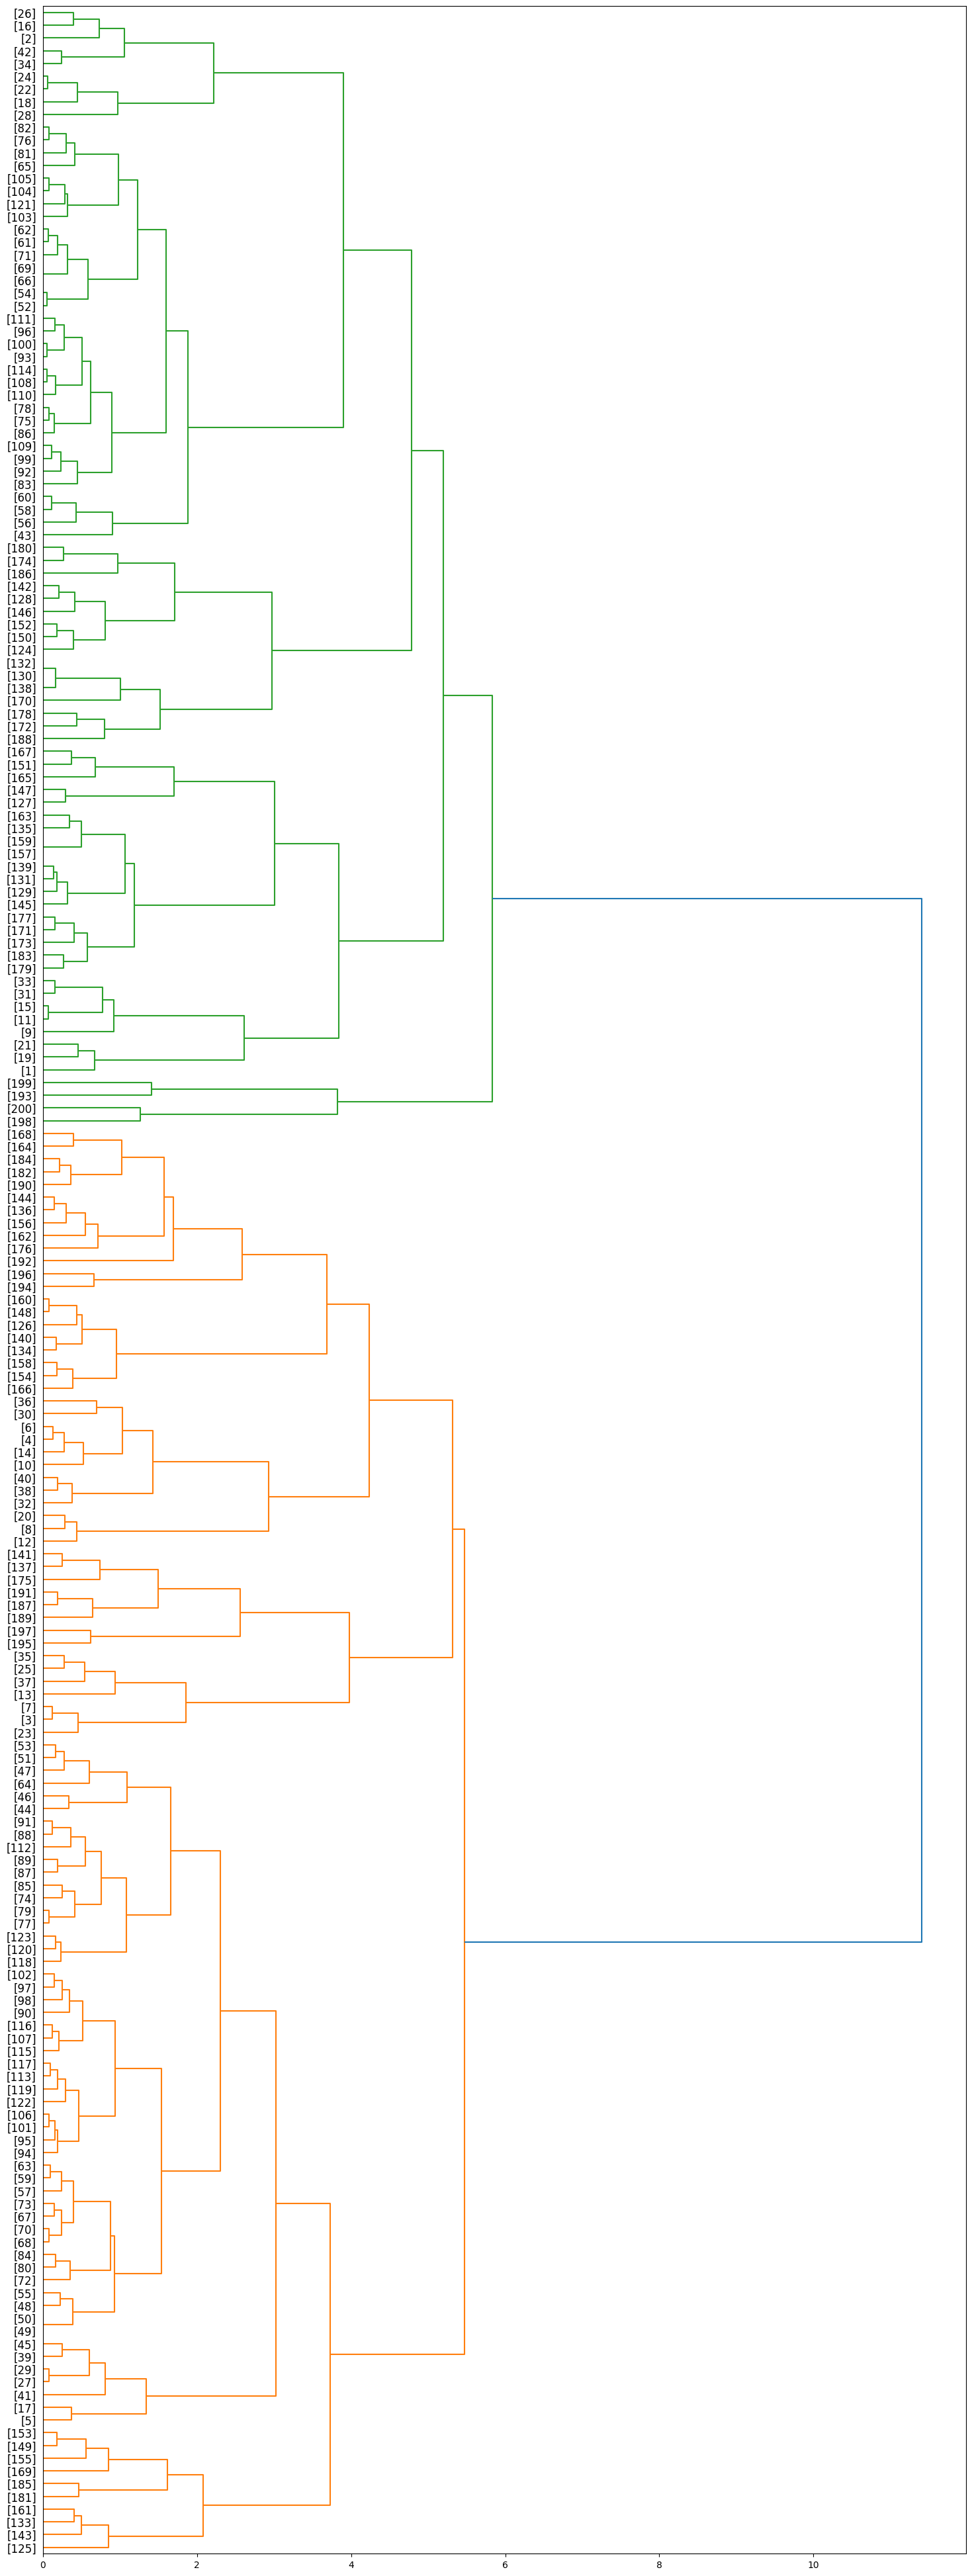

In [86]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' % (df.index[id])
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Send us the Result (Maktabkhoone)